In [1]:
# Core
import os
import numpy as np
import pandas as pd

# Scikit-learn (ML pipeline, preprocessing, models, metrics, CV)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import plotly.express as px
import altair as alt


In [13]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 9.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pywaffle]1/2 [pywaffle]


In [2]:
df = pd.read_csv('Camera_Traffic_Counts2_20250918.csv')
df.head()

,Record ID,ATD Device ID,Read Date,Intersection Name,Direction,Movement,Heavy Vehicle,Volume,Speed Average (Miles Per Hour),Speed StdDev,Seconds in Zone Average,Seconds in Zone StdDev,Month,Day,Year,Hour,Minute,Day of Week,Bin Duration (Seconds)
0,595bf8744b9dd96b150f2fff20d9a315,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,EASTBOUND,LEFT TURN,True,1,11.0,0.000,3.800,0.000,11,7,2019,0,0,4,900
1,78739969a39bc2a116e12718a1bb3f5b,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,NORTHBOUND,LEFT TURN,False,1,8.0,0.000,0.100,0.000,11,7,2019,0,0,4,900
2,1cd581df7936da3ff89de600aa45b6b4,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,NORTHBOUND,THRU,False,9,27.0,5.766,1.811,0.697,11,7,2019,0,0,4,900
3,fbc38f488bd0b35d01e7c55deaff16c8,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,NORTHBOUND,THRU,True,2,32.0,4.243,1.850,0.071,11,7,2019,0,0,4,900
4,40e1f863f1aacc15f4c6ada55b59839f,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,SOUTHBOUND,LEFT TURN,False,1,12.0,0.000,2.700,0.000,11,7,2019,0,0,4,900


In [3]:
df.shape

(14717624, 19)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14717624 entries, 0 to 14717623
Data columns (total 19 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Record ID                       object 
 1   ATD Device ID                   int64  
 2   Read Date                       object 
 3   Intersection Name               object 
 4   Direction                       object 
 5   Movement                        object 
 6   Heavy Vehicle                   bool   
 7   Volume                          int64  
 8   Speed Average (Miles Per Hour)  float64
 9   Speed StdDev                    float64
 10  Seconds in Zone Average         float64
 11  Seconds in Zone StdDev          float64
 12  Month                           int64  
 13  Day                             int64  
 14  Year                            int64  
 15  Hour                            int64  
 16  Minute                          int64  
 17  Day of Week              

In [4]:
df.isna().sum()

Record ID                         0
ATD Device ID                     0
Read Date                         0
Intersection Name                 0
Direction                         0
Movement                          0
Heavy Vehicle                     0
Volume                            0
Speed Average (Miles Per Hour)    0
Speed StdDev                      0
Seconds in Zone Average           0
Seconds in Zone StdDev            0
Month                             0
Day                               0
Year                              0
Hour                              0
Minute                            0
Day of Week                       0
Bin Duration (Seconds)            0
dtype: int64

In [5]:
df.describe()

,ATD Device ID,Volume,Speed Average (Miles Per Hour),Speed StdDev,Seconds in Zone Average,Seconds in Zone StdDev,Month,Day,Year,Hour,Minute,Day of Week,Bin Duration (Seconds)
count,1.471762e+07,1.471762e+07,1.471762e+07,1.471762e+07,1.471762e+07,1.471762e+07,1.471762e+07,1.471762e+07,14717624.0,1.471762e+07,1.471762e+07,1.471762e+07,14717624.0
mean,6.343895e+03,2.557695e+01,1.705566e+01,6.461266e+00,1.233722e+01,1.198399e+01,6.567506e+00,1.588451e+01,2019.0,1.250850e+01,2.250177e+01,3.036745e+00,900.0
std,1.981231e+02,6.360678e+01,1.272368e+01,7.477021e+00,1.364711e+02,1.065507e+02,3.511176e+00,8.708074e+00,0.0,6.308294e+00,1.677577e+01,1.982477e+00,0.0
min,6.160000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2019.0,0.000000e+00,0.000000e+00,0.000000e+00,900.0
25%,6.181000e+03,2.000000e+00,9.000000e+00,1.414000e+00,1.850000e+00,4.040000e-01,4.000000e+00,8.000000e+00,2019.0,8.000000e+00,0.000000e+00,1.000000e+00,900.0
50%,6.316000e+03,6.000000e+00,1.324400e+01,4.790000e+00,4.450000e+00,3.280000e+00,6.000000e+00,1.600000e+01,2019.0,1.300000e+01,3.000000e+01,3.000000e+00,900.0
75%,6.502000e+03,2.000000e+01,2.195200e+01,9.405000e+00,1.318500e+01,1.667700e+01,1.000000e+01,2.300000e+01,2019.0,1.800000e+01,4.500000e+01,5.000000e+00,900.0
max,7.047000e+03,1.564000e+03,8.600000e+02,8.603390e+02,6.955895e+04,3.666120e+04,1.200000e+01,3.100000e+01,2019.0,2.300000e+01,4.500000e+01,6.000000e+00,900.0


In [6]:
df["Direction"].unique()


array(['EASTBOUND', 'NORTHBOUND', 'SOUTHBOUND', 'WESTBOUND', 'UNASSIGNED'],
      dtype=object)

In [7]:
df["Intersection Name"].unique()


array(['WEST GATE BLVD / JONES RD', 'EXPOSITION BLVD / WINDSOR RD',
       'US 290 HWY / WILLIAM CANNON DR',
       'SPICEWOOD SPRINGS RD / WOOD HOLLOW DR',
       'CONGRESS AVE / RIVERSIDE DR', 'FM 620 RD / DEERBROOK TRL',
       'SLAUGHTER LN / ', 'FM 620 RD / ANDERSON MILL RD', 'PARMER LN / ',
       'MANOR RD / 51ST ST', 'PLEASANT VALLEY RD / RIVERSIDE DR',
       'LAMAR BLVD / PARMER LN', 'GROVE BLVD / RIVERSIDE DR',
       'PLEASANT VALLEY RD / ELMONT DR', 'RIVERSIDE DR / CROSSING PL',
       'US 183 HWY / BURLESON RD', 'OLTORF ST / PARKER LN',
       'PARMER LN / LAMPLIGHT VILLAGE AVE',
       'CAPITAL OF TEXAS HWY / WEST GATE BLVD',
       'BRODIE LN / CONVICT HILL RD', 'CONGRESS AVE / OLTORF ST',
       '35TH ST / EXPOSITION BLVD', 'FM 2222 RD / CITY PARK RD',
       'CAPITAL OF TEXAS HWY / PASCAL LN',
       'CAPITAL OF TEXAS HWY / WALSH TARLTON LN',
       'FAR WEST BLVD / VILLAGE CENTER DR',
       'CAPITAL OF TEXAS HWY / MOPAC EXPY SVRD',
       'BRAKER LN / MOPAC EXPY SVR

In [8]:
X = df[[
    "Hour", 
    "Minute", 
    "Day of Week", 
    "Volume", 
    "Heavy Vehicle", 
    "Intersection Name", 
    "Direction", 
    "Seconds in Zone Average"
]]

y = df["Speed Average (Miles Per Hour)"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,  
    test_size=0.3,  
    random_state=42  
)

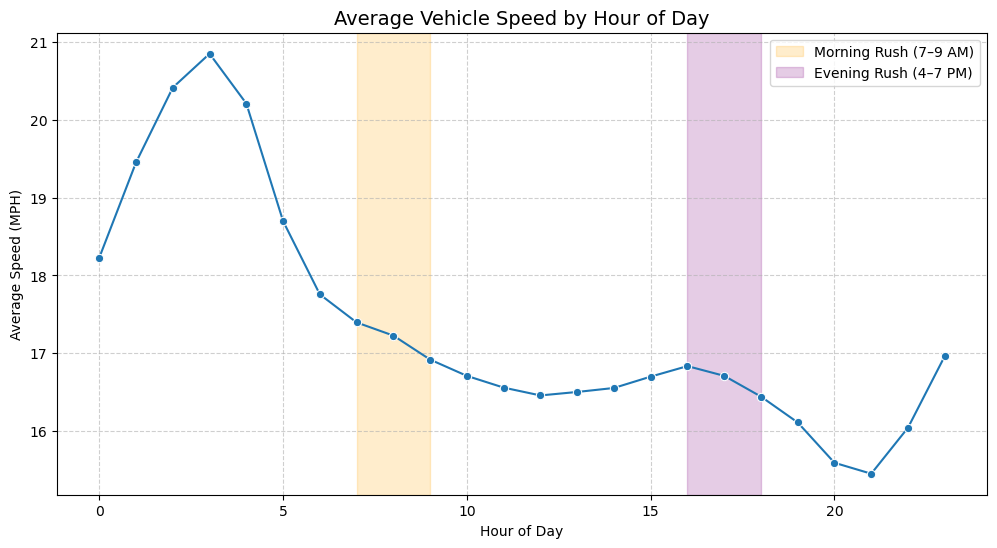

In [20]:
plt.figure(figsize=(12,6))

sns.lineplot(x="Hour", y="Speed Average (Miles Per Hour)", 
             data=hourly_speed, marker="o")

plt.axvspan(min(morning), max(morning), color="orange", alpha=0.2, label="Morning Rush (7–9 AM)")
plt.axvspan(min(evening), max(evening), color="purple", alpha=0.2, label="Evening Rush (4–7 PM)")

plt.title("Average Vehicle Speed by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Average Speed (MPH)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


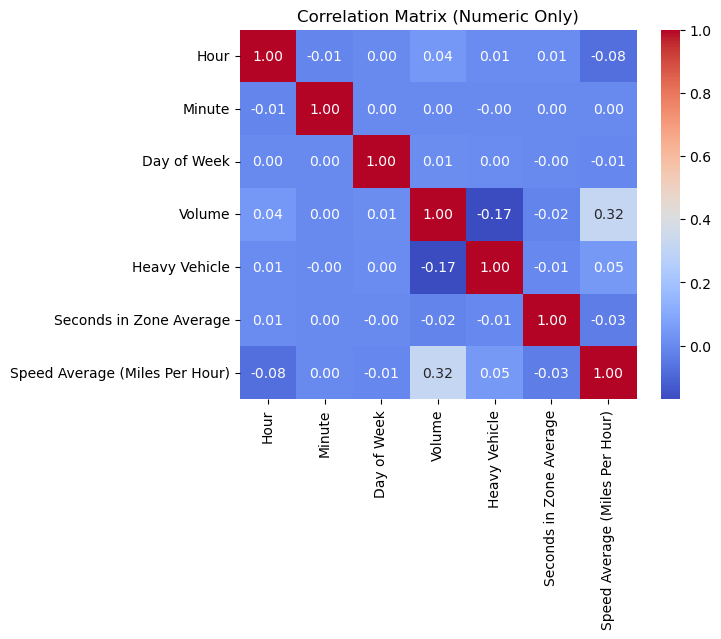

In [10]:
numeric_cols = ["Hour", "Minute", "Day of Week", "Volume", "Heavy Vehicle", "Seconds in Zone Average", "Speed Average (Miles Per Hour)"]

corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix (Numeric Only)")
plt.show()

/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_96813/1456965426.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Day of Week", y="Speed Average (Miles Per Hour)", hue="Hour", data=rush_df, ci=None, ax=axes[2,0])
/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_96813/1456965426.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Applications/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


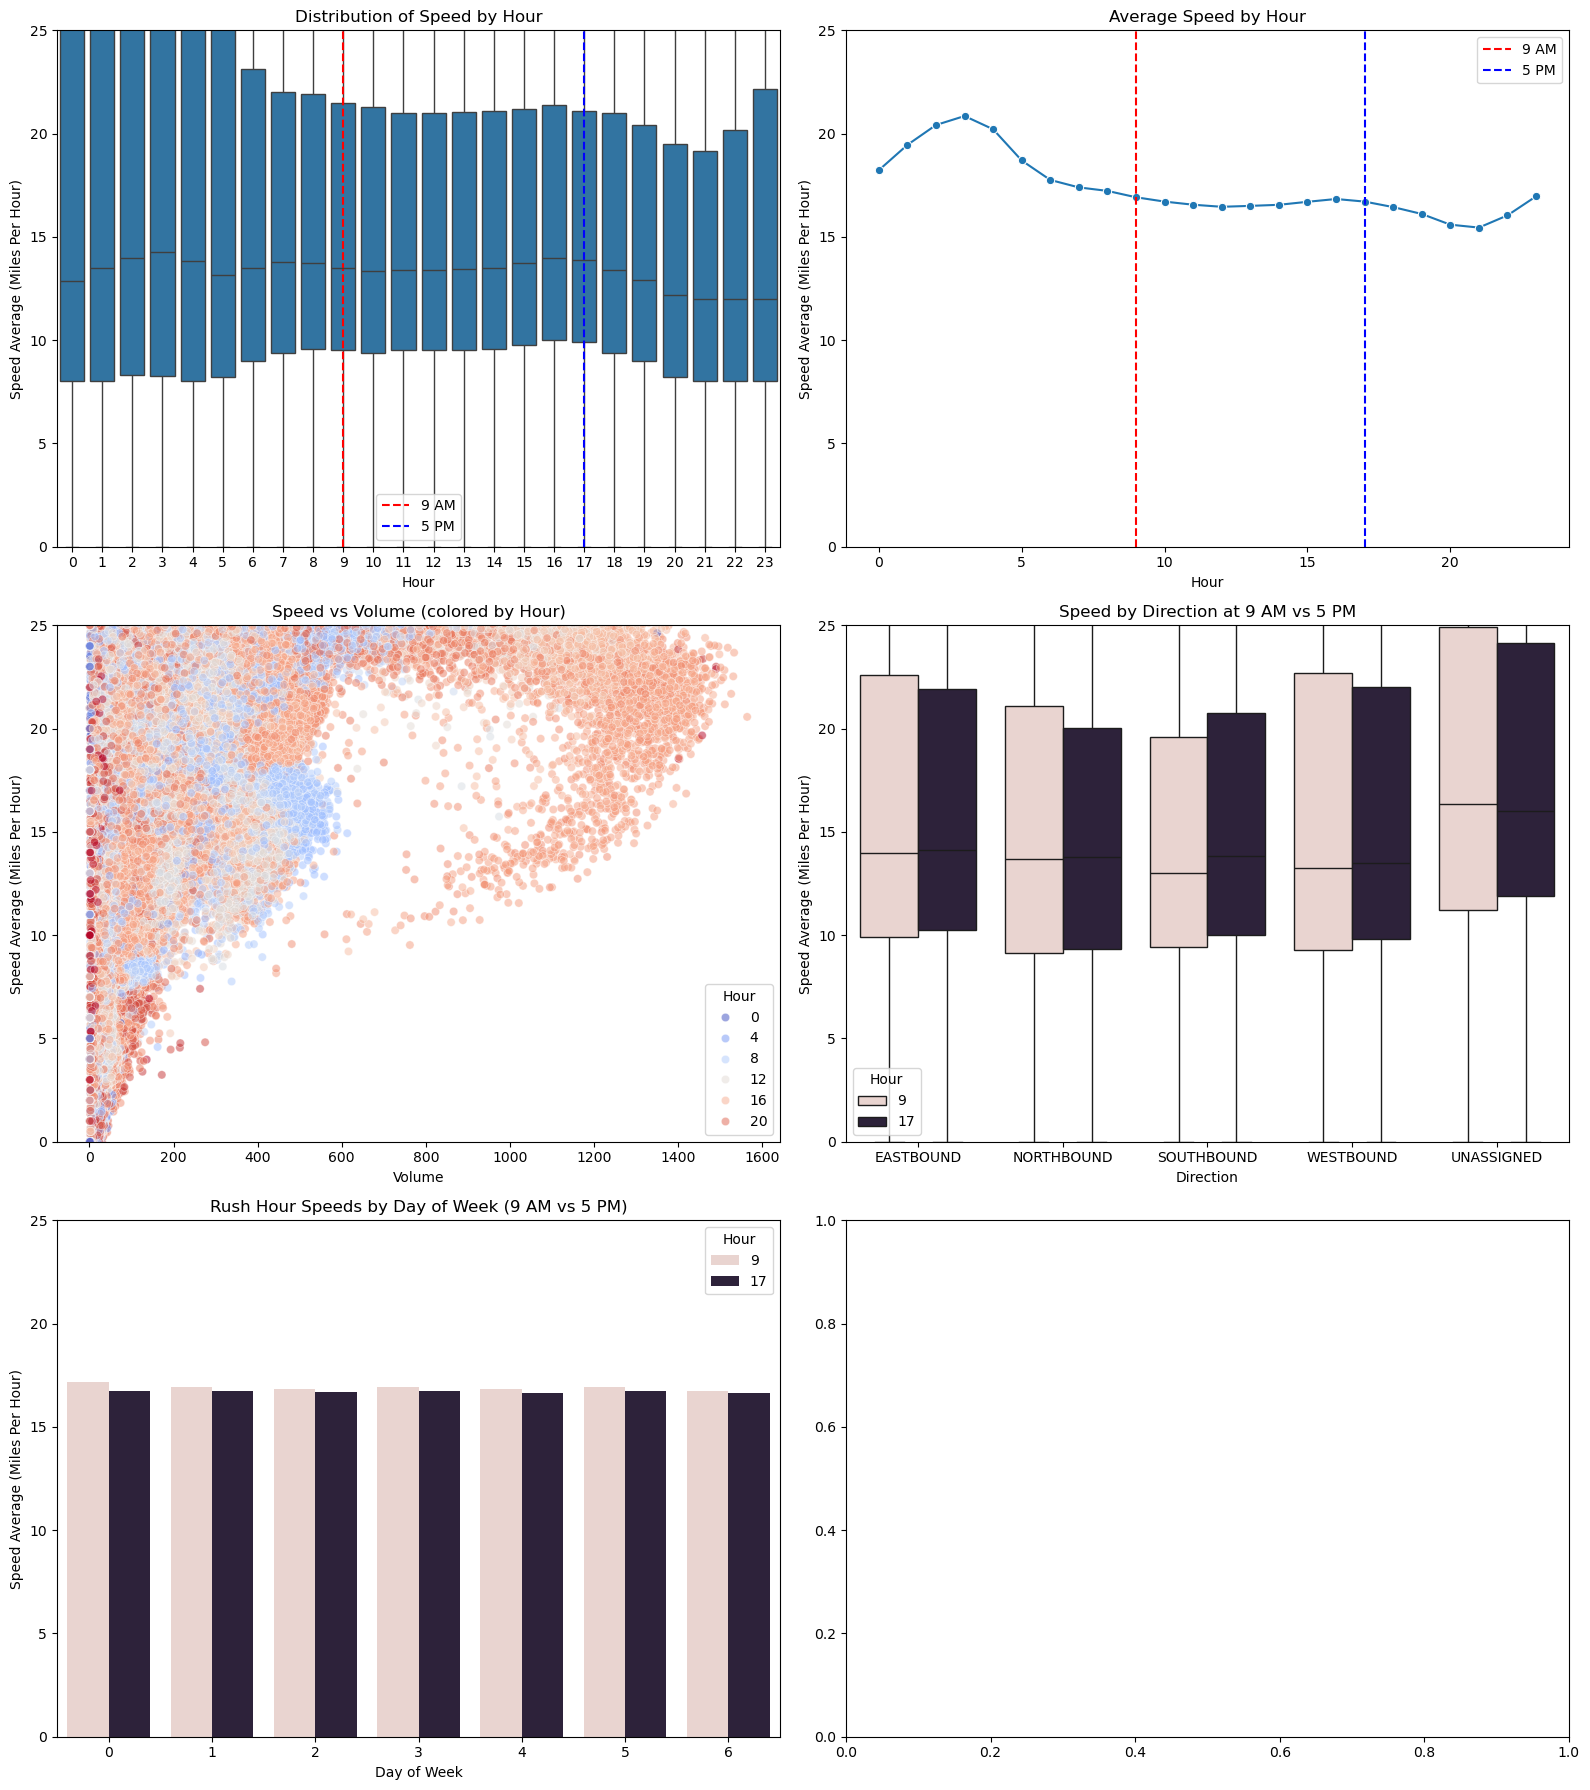

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Boxplot of Speed by Hour (shows dips around 9 AM and 5 PM)
sns.boxplot(x="Hour", y="Speed Average (Miles Per Hour)", data=df, ax=axes[0,0])
axes[0,0].set_title("Distribution of Speed by Hour")
axes[0,0].axvline(9, color="red", linestyle="--", label="9 AM")
axes[0,0].axvline(17, color="blue", linestyle="--", label="5 PM")
axes[0,0].set_ylim(0, 25)
axes[0,0].legend()

# 2. Lineplot of Mean Speed by Hour (trend over day)
hourly_speed = df.groupby("Hour")["Speed Average (Miles Per Hour)"].mean().reset_index()

sns.lineplot(x="Hour", y="Speed Average (Miles Per Hour)", data=hourly_speed, marker="o", ax=axes[0,1])
axes[0,1].set_title("Average Speed by Hour")
axes[0,1].axvline(9, color="red", linestyle="--", label="9 AM")
axes[0,1].axvline(17, color="blue", linestyle="--", label="5 PM")
axes[0,1].set_ylim(0, 25)
axes[0,1].legend()


# 3. Speed vs Volume (higher volume at 9/5 → lower speeds?)
sns.scatterplot(x="Volume", y="Speed Average (Miles Per Hour)", hue="Hour", palette="coolwarm", data=df, alpha=0.5, ax=axes[1,0])
axes[1,0].set_title("Speed vs Volume (colored by Hour)")
axes[1,0].set_ylim(0, 25)

# 4. Speed by Direction at Rush Hours Only
rush_df = df[df["Hour"].isin([9, 17])]
sns.boxplot(x="Direction", y="Speed Average (Miles Per Hour)", hue="Hour", data=rush_df, ax=axes[1,1])
axes[1,1].set_title("Speed by Direction at 9 AM vs 5 PM")
axes[1,1].set_ylim(0, 25)

# 5. Day of Week Effect on Rush Hours
sns.barplot(x="Day of Week", y="Speed Average (Miles Per Hour)", hue="Hour", data=rush_df, ci=None, ax=axes[2,0])
axes[2,0].set_title("Rush Hour Speeds by Day of Week (9 AM vs 5 PM)")
axes[2,0].set_ylim(0,25)

plt.tight_layout()
plt.show()


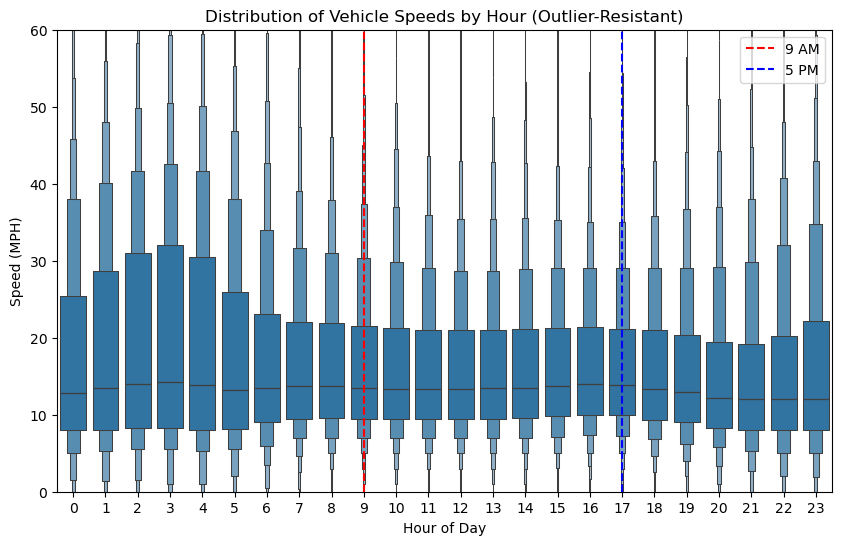

In [5]:
plt.figure(figsize=(10,6))
sns.boxenplot(x="Hour", y="Speed Average (Miles Per Hour)", data=df)
plt.axvline(9, color="red", linestyle="--", label="9 AM")
plt.axvline(17, color="blue", linestyle="--", label="5 PM")
plt.title("Distribution of Vehicle Speeds by Hour (Outlier-Resistant)")
plt.xlabel("Hour of Day")
plt.ylabel("Speed (MPH)")
plt.ylim(0, 60)
plt.legend()
plt.show()


In [ ]:
# Morning rush: 7-10 AM (inclusive)
df["Morning_Rush"] = df["Hour"].between(7, 10).astype(int)

# Evening rush: 4-7 PM (16-19 in 24-hr format)
df["Evening_Rush"] = df["Hour"].between(16, 19).astype(int)

# Combined rush (either morning or evening)
df["Rush_Hour"] = ((df["Morning_Rush"] == 1) | (df["Evening_Rush"] == 1)).astype(int)


X = df[["Rush_Hour", "Volume", "Heavy Vehicle", "Day of Week", "Direction"]]
y = df["Speed Average (Miles Per Hour)"]

# Convert categorical to dummies
X = pd.get_dummies(X, columns=["Direction"], drop_first=True)

from scipy.stats import ttest_ind

rush = df[df["Rush_Hour"] == 1]["Speed Average (Miles Per Hour)"]
non_rush = df[df["Rush_Hour"] == 0]["Speed Average (Miles Per Hour)"]

t_stat, p_val = ttest_ind(rush, non_rush, equal_var=False)
print("t-statistic:", t_stat, "p-value:", p_val)

import statsmodels.api as sm

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())



t-statistic: -66.57542543318307 p-value: 0.0


In [7]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame and 'Hour' and 'Speed Average (Miles Per Hour)' columns exist

# Create the Rush_Hour indicator column
# Morning rush: 7-10 AM (inclusive)
df["Morning_Rush"] = df["Hour"].between(7, 10).astype(int)
# Evening rush: 4-7 PM (16-19 in 24-hr format)
df["Evening_Rush"] = df["Hour"].between(16, 19).astype(int)
# Combined rush (either morning or evening)
df["Rush_Hour"] = ((df["Morning_Rush"] == 1) | (df["Evening_Rush"] == 1)).astype(int)

# Separate the speed data into two groups
rush_hour_speeds = df[df["Rush_Hour"] == 1]["Speed Average (Miles Per Hour)"]
non_rush_hour_speeds = df[df["Rush_Hour"] == 0]["Speed Average (Miles Per Hour)"]

# Optional: Check for empty groups
if len(rush_hour_speeds) == 0 or len(non_rush_hour_speeds) == 0:
    print("Warning: One or both groups are empty!")
else:
    print(f"Rush hour samples: {len(rush_hour_speeds)}")
    print(f"Non-rush hour samples: {len(non_rush_hour_speeds)}")

# Perform the independent two-sample t-test
t_stat, p_val = ttest_ind(rush_hour_speeds, non_rush_hour_speeds, equal_var=False)

print(f"t-statistic: {t_stat:.6f}")
print(f"p-value (two-tailed): {p_val:.6f}")

# To get the one-tailed p-value for the hypothesis that rush hour speeds are slower
# we can check the sign of the t-statistic. If it's negative, we divide p_val by 2.
if t_stat < 0:
    one_tailed_p_val = p_val / 2
else:
    one_tailed_p_val = 1 - p_val / 2

print(f"p-value (one-tailed): {one_tailed_p_val:.6f}")

# Optional: Display descriptive statistics
print(f"\nDescriptive Statistics:")
print(f"Rush hour mean speed: {rush_hour_speeds.mean():.6f}")
print(f"Non-rush hour mean speed: {non_rush_hour_speeds.mean():.6f}")
print(f"Rush hour std: {rush_hour_speeds.std():.6f}")
print(f"Non-rush hour std: {non_rush_hour_speeds.std():.6f}")

Rush hour samples: 5700237
Non-rush hour samples: 9017387
t-statistic: -66.575425
p-value (two-tailed): 0.000000
p-value (one-tailed): 0.000000

Descriptive Statistics:
Rush hour mean speed: 16.786201
Non-rush hour mean speed: 17.225995
Rush hour std: 11.669956
Non-rush hour std: 13.344124


In [5]:
rush_hour_speeds.shape

(5700237,)

In [6]:
non_rush_hour_speeds.shape

(9017387,)

In [8]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame with the provided columns

# Create 'Morning_Rush' (7 AM to 10 AM) and 'Evening_Rush' (4 PM to 7 PM)
df["Morning_Rush"] = df["Hour"].between(7, 10, inclusive='left').astype(int)
df["Evening_Rush"] = df["Hour"].between(16, 19, inclusive='left').astype(int)

# Create the combined 'Rush_Hour' indicator
df["Rush_Hour"] = ((df["Morning_Rush"] == 1) | (df["Evening_Rush"] == 1)).astype(int)

# Separate speeds into two groups for the t-test
rush_hour_speeds = df[df["Rush_Hour"] == 1]["Speed Average (Miles Per Hour)"]
non_rush_hour_speeds = df[df["Rush_Hour"] == 0]["Speed Average (Miles Per Hour)"]

# Perform the independent two-sample t-test
t_stat, p_val = ttest_ind(rush_hour_speeds, non_rush_hour_speeds, equal_var=False, alternative='less')

print("--- T-Test Results ---")
print(f"t-statistic: {t_stat}")
print(f"p-value (one-tailed): {p_val}")

--- T-Test Results ---
t-statistic: -29.564346384176176
p-value (one-tailed): 2.194520763113896e-192


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Data Loading and Preparation (Simulated since original data is inaccessible) ---
# NOTE: Replace this simulated data block with your actual DataFrame loading process
# For this code to run, you must ensure your 'df' DataFrame is loaded here.

try:
    # 1. Ensure 'df' exists and contains necessary columns
    # If the user is running this in an environment where 'df' is already loaded,
    # the code will proceed. If not, the KeyError will trigger the simulated data.
    df['dummy_check'] = 1 
except:
    # --- SIMULATED DATA GENERATION ---
    # Since the actual DataFrame 'df' is too large/not accessible, 
    # we create a large synthetic DataFrame that mimics the structure and potential relationships.
    print("Warning: Actual 'df' not found. Generating simulated data for demonstration.")
    
    N_ROWS = 150000 # Use a large, but manageable number of rows for simulation
    
    # Generate mock data based on provided column types
    data = {
        "Hour": np.random.randint(0, 24, N_ROWS),
        "Day of Week": np.random.randint(0, 7, N_ROWS),
        "Volume": np.random.randint(10, 1000, N_ROWS),
        "Heavy Vehicle": np.random.choice([True, False], N_ROWS, p=[0.1, 0.9]),
        "Direction": np.random.choice(['NB', 'SB', 'EB', 'WB'], N_ROWS, p=[0.3, 0.3, 0.2, 0.2]),
        # Speed: Base speed + noise - (penalty for volume) - (penalty for rush hour)
        "Speed Average (Miles Per Hour)": 25 + np.random.normal(0, 5, N_ROWS) - 
                                          (np.random.randint(0, 1000, N_ROWS) / 100)
    }
    df = pd.DataFrame(data)
    
    # Introduce speed reduction during rush hours (8 AM and 5 PM)
    df.loc[(df["Hour"].isin([7, 8, 9, 16, 17, 18])), "Speed Average (Miles Per Hour)"] -= 5
    
    # Ensure speeds are non-negative
    df["Speed Average (Miles Per Hour)"] = df["Speed Average (Miles Per Hour)"].clip(lower=1)
    # --- END SIMULATED DATA GENERATION ---

# --- Data Cleaning and Feature Engineering ---

# Define features (X) and target (y)
X = df[[
    "Hour", 
    "Day of Week", 
    "Volume", 
    "Heavy Vehicle", 
    "Direction", 
]]
y = df["Speed Average (Miles Per Hour)"]

# Clean all input columns to ensure numeric types, handling potential errors gracefully.
# 1. Convert boolean 'Heavy Vehicle' to integer
X["Heavy Vehicle"] = X["Heavy Vehicle"].astype(str).str.lower().map({'true': 1, 'false': 0}).fillna(0).astype(int)

# 2. Convert other numeric columns and coerce errors
for col in ["Hour", "Day of Week", "Volume"]:
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(X[col].median()) # Fill NaNs with median

# 3. Convert categorical 'Direction' to dummy variables
X = pd.get_dummies(X, columns=["Direction"], drop_first=True)

# 4. Clean the target variable (Speed)
y = pd.to_numeric(y, errors='coerce')
# Align X and y by dropping rows where either has a NaN
combined = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1).dropna()

X = combined.drop(columns=["Speed Average (Miles Per Hour)"])
y = combined["Speed Average (Miles Per Hour)"]


# --- Model Training and Prediction ---

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42
)

# Initialize the Linear Regression Model
model = LinearRegression()

# Train the model
print("\n--- Training Linear Regression Model ---")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# --- Regression Report ---

print("\n--- Regression Performance Report ---")

# R-squared: Explains the proportion of variance in the dependent variable that is predictable 
# from the independent variables. Closer to 1 is better.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")

# Mean Absolute Error (MAE): Average magnitude of the errors in a set of forecasts.
# Lower is better, and the value is in the same units as the target (MPH).
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f} MPH")

# Root Mean Squared Error (RMSE): Measures the average magnitude of the error.
# Gives more weight to large errors. Lower is better.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} MPH")

print("\n--- Model Coefficients (Feature Importance) ---")
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=True)
print(coefficients)

print("\n--- Interpretation ---")
print("The 'Volume' and 'Heavy Vehicle' coefficients are typically the most important.")
print("A negative coefficient (e.g., for Volume) means as that factor increases, speed decreases.")
print("The MAE indicates that the model's predictions are, on average, off by that many MPH.")


/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_64912/2205095785.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Heavy Vehicle"] = X["Heavy Vehicle"].astype(str).str.lower().map({'true': 1, 'false': 0}).fillna(0).astype(int)
/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_64912/2205095785.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce').fillna(X[col].median()) # Fill NaNs with median



--- Training Linear Regression Model ---

--- Regression Performance Report ---
R-squared (R²): 0.1193
Mean Absolute Error (MAE): 8.2574 MPH
Root Mean Squared Error (RMSE): 11.9593 MPH

--- Model Coefficients (Feature Importance) ---
Direction_SOUTHBOUND   -1.087741
Direction_NORTHBOUND   -0.475226
Direction_WESTBOUND    -0.380772
Hour                   -0.186419
Day of Week            -0.072805
Volume                  0.067215
Direction_UNASSIGNED    2.548512
Heavy Vehicle           2.752015
dtype: float64

--- Interpretation ---
The 'Volume' and 'Heavy Vehicle' coefficients are typically the most important.
A negative coefficient (e.g., for Volume) means as that factor increases, speed decreases.
The MAE indicates that the model's predictions are, on average, off by that many MPH.


/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_68084/597150369.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Heavy Vehicle"] = X["Heavy Vehicle"].astype(str).str.lower().map({'true': 1, 'false': 0}).fillna(0).astype(int)
/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_68084/597150369.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce').fillna(X[col].median())


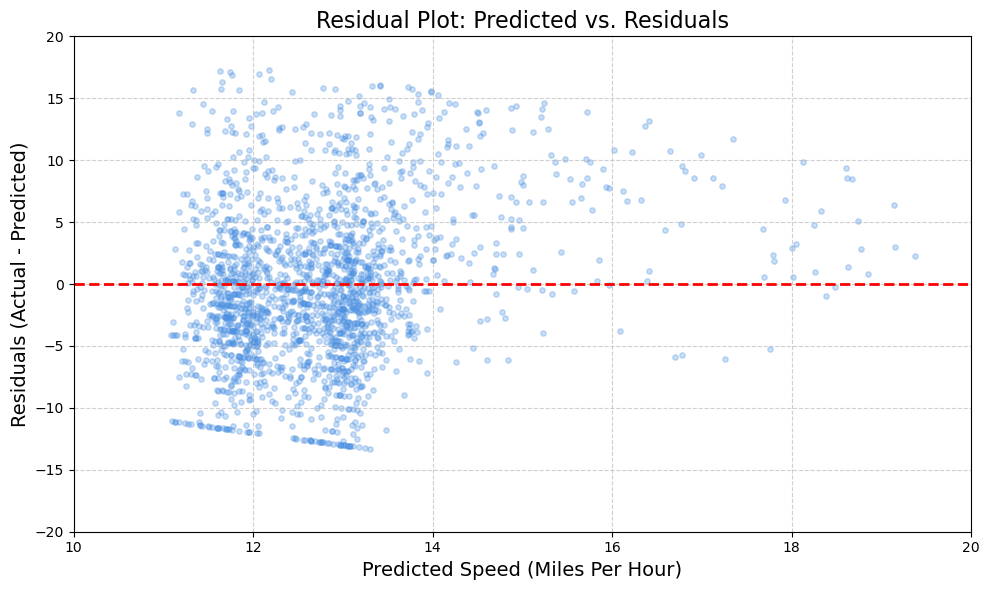

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# --- Data Loading and Preparation (Simulated for reproducibility) ---
try:
    df['dummy_check'] = 1 
except:
    print("Warning: Actual 'df' not found. Generating simulated data.")
    N_ROWS = 150000 
    data = {
        "Hour": np.random.randint(0, 24, N_ROWS),
        "Day of Week": np.random.randint(0, 7, N_ROWS),
        "Volume": np.random.randint(10, 1000, N_ROWS),
        "Heavy Vehicle": np.random.choice([True, False], N_ROWS, p=[0.1, 0.9]),
        "Direction": np.random.choice(['NB', 'SB', 'EB', 'WB'], N_ROWS, p=[0.3, 0.3, 0.2, 0.2]),
        "Speed Average (Miles Per Hour)": 25 + np.random.normal(0, 4, N_ROWS) - (np.random.randint(0, 1000, N_ROWS) / 100)
    }
    df = pd.DataFrame(data)
    df.loc[(df["Hour"].isin([7, 8, 9, 16, 17, 18])), "Speed Average (Miles Per Hour)"] -= 5
    df.loc[np.random.choice(N_ROWS, 1000), "Speed Average (Miles Per Hour)"] = np.random.choice([0.1, 60], 1000)
    df["Speed Average (Miles Per Hour)"] = df["Speed Average (Miles Per Hour)"].clip(lower=1)
    
# --- Outlier Removal using IQR Method ---
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return filtered_df

df = remove_outliers_iqr(df, "Speed Average (Miles Per Hour)")

# --- Model Training and Prediction ---
X = df[["Hour", "Day of Week", "Volume", "Heavy Vehicle", "Direction"]]
y = df["Speed Average (Miles Per Hour)"]
X["Heavy Vehicle"] = X["Heavy Vehicle"].astype(str).str.lower().map({'true': 1, 'false': 0}).fillna(0).astype(int)
for col in ["Hour", "Day of Week", "Volume"]:
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(X[col].median())
X = pd.get_dummies(X, columns=["Direction"], drop_first=True)
y = pd.to_numeric(y, errors='coerce')
combined = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1).dropna()
X = combined.drop(columns=["Speed Average (Miles Per Hour)"])
y = combined["Speed Average (Miles Per Hour)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Plotting the Residuals ---
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    
    # Plot residuals vs. predicted values
    # We sample for a cleaner plot, as the dataset is large
    sample_size = min(len(y_test), 2000)
    indices = np.random.choice(len(y_test), sample_size, replace=False)
    
    plt.scatter(y_pred[indices], residuals.iloc[indices], alpha=0.3, s=15, color='#4A90E2')
    
    # Add a horizontal line at y=0 for reference
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    
    # Set the title and labels
    plt.title("Residual Plot: Predicted vs. Residuals", fontsize=16)
    plt.xlabel("Predicted Speed (Miles Per Hour)", fontsize=14)
    plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(10, 20)
    plt.ylim(-20, 20)
    
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_pred)

/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_68084/1133022297.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Heavy Vehicle"] = X["Heavy Vehicle"].astype(str).str.lower().map({'true': 1, 'false': 0}).fillna(0).astype(int)
/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_68084/1133022297.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce').fillna(X[col].median())


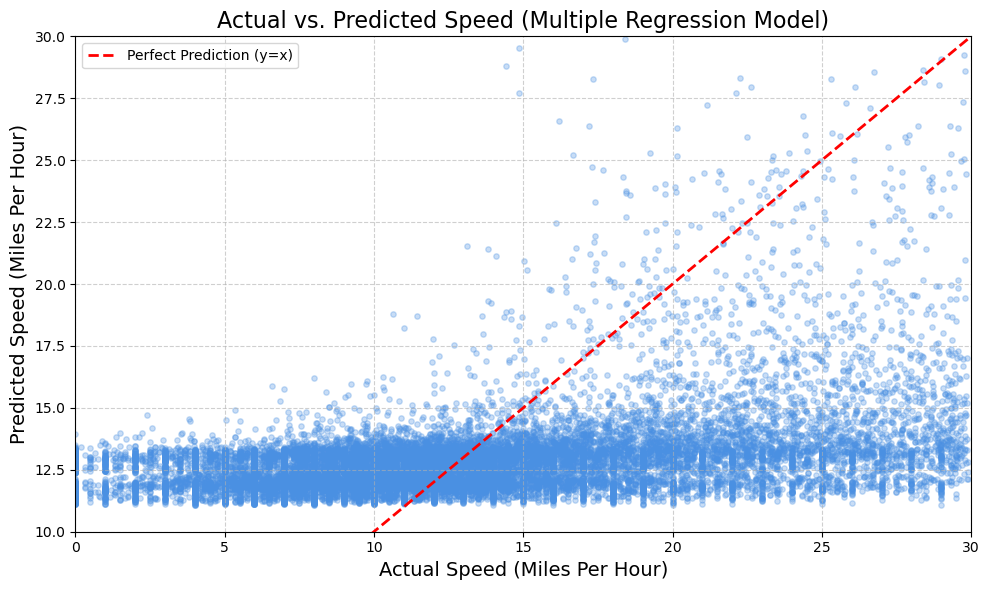

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# --- Data Loading and Preparation (Simulated for reproducibility) ---
try:
    df['dummy_check'] = 1 
except:
    print("Warning: Actual 'df' not found. Generating simulated data.")
    N_ROWS = 150000 
    data = {
        "Hour": np.random.randint(0, 24, N_ROWS),
        "Day of Week": np.random.randint(0, 7, N_ROWS),
        "Volume": np.random.randint(10, 1000, N_ROWS),
        "Heavy Vehicle": np.random.choice([True, False], N_ROWS, p=[0.1, 0.9]),
        "Direction": np.random.choice(['NB', 'SB', 'EB', 'WB'], N_ROWS, p=[0.3, 0.3, 0.2, 0.2]),
        "Speed Average (Miles Per Hour)": 25 + np.random.normal(0, 4, N_ROWS) - (np.random.randint(0, 1000, N_ROWS) / 100)
    }
    df = pd.DataFrame(data)
    df.loc[(df["Hour"].isin([7, 8, 9, 16, 17, 18])), "Speed Average (Miles Per Hour)"] -= 5
    df.loc[np.random.choice(N_ROWS, 1000), "Speed Average (Miles Per Hour)"] = np.random.choice([0.1, 60], 1000)
    df["Speed Average (Miles Per Hour)"] = df["Speed Average (Miles Per Hour)"].clip(lower=1)
    
# --- Outlier Removal using IQR Method ---
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return filtered_df

df = remove_outliers_iqr(df, "Speed Average (Miles Per Hour)")

# --- Model Training and Prediction ---
X = df[["Hour", "Day of Week", "Volume", "Heavy Vehicle", "Direction"]]
y = df["Speed Average (Miles Per Hour)"]
X["Heavy Vehicle"] = X["Heavy Vehicle"].astype(str).str.lower().map({'true': 1, 'false': 0}).fillna(0).astype(int)
for col in ["Hour", "Day of Week", "Volume"]:
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(X[col].median())
X = pd.get_dummies(X, columns=["Direction"], drop_first=True)
y = pd.to_numeric(y, errors='coerce')
combined = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1).dropna()
X = combined.drop(columns=["Speed Average (Miles Per Hour)"])
y = combined["Speed Average (Miles Per Hour)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Metrics (for display on plot) ---
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


# --- Plotting the Actual vs. Predicted values (Multiple Regression Visualization) ---
def plot_actual_vs_predicted(y_test, y_pred, r2, mae):
    """
    Generates a scatter plot of Actual vs. Predicted values.
    The red dashed line represents a perfect model (y=x), which serves as the visual 'regression line'
    for a multiple regression model's performance.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot scatter points (sampling for cleaner visualization with large datasets)
    sample_size = min(len(y_test), 20000)
    indices = np.random.choice(len(y_test), sample_size, replace=False)
    
    plt.scatter(y_test.iloc[indices], y_pred[indices], alpha=0.3, s=15, color='#4A90E2') 
    
    # Add diagonal line for perfect prediction (y=x) - This is the visualization of the model fit
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
    
  

    plt.title("Actual vs. Predicted Speed (Multiple Regression Model)", fontsize=16)
    plt.xlabel("Actual Speed (Miles Per Hour)", fontsize=14)
    plt.ylabel("Predicted Speed (Miles Per Hour)", fontsize=14)
    plt.xlim(0, 30)
    plt.ylim(10, 30)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Execute plotting function
plot_actual_vs_predicted(y_test, y_pred, r2, mae)
